In [16]:
import sys
sys.path.append('..')

import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import pytorch.train as pyttrain

In [19]:
training_progressions = []
for epoch in range(pyttrain.N_EPOCHS):
    with open("../pytorch" / pyttrain.EPOCH_DATA_DIR_PATH / pyttrain.EPOCH_DATA_FILE.format(epoch), "rb") as f:
        preds = pickle.load(f)

        training_progressions.append(preds)

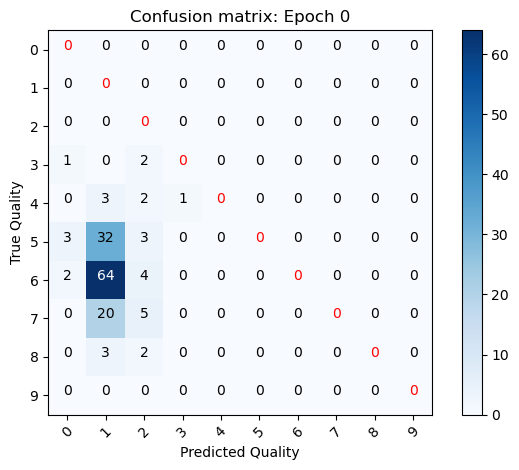

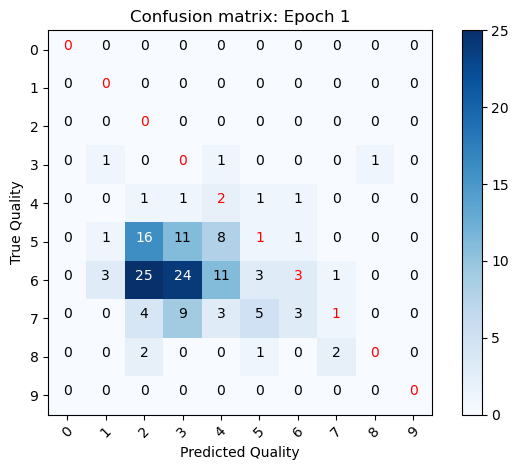

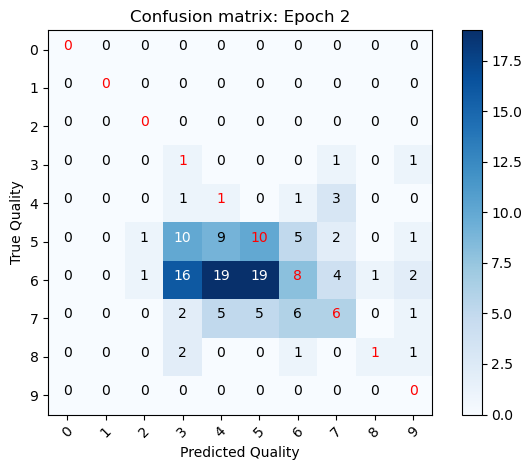

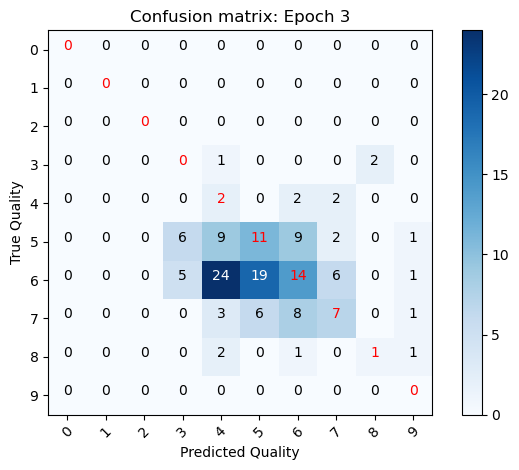

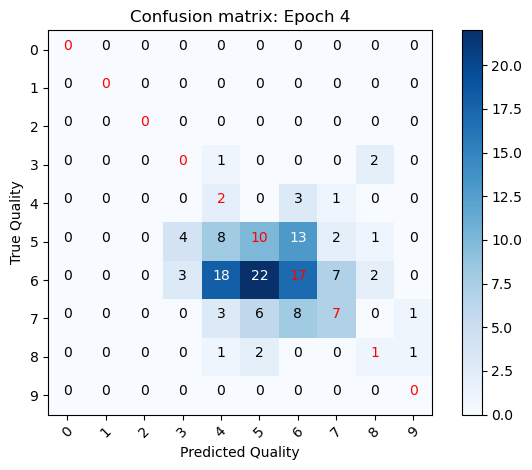

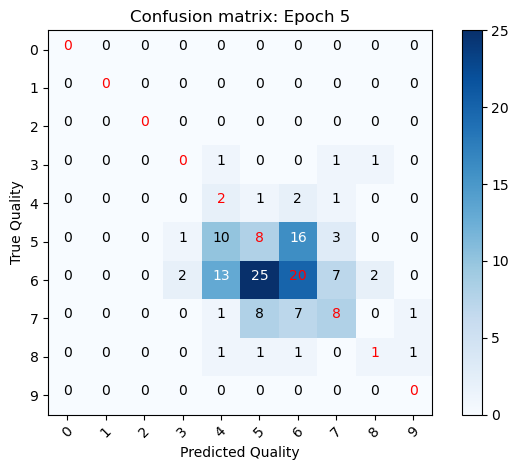

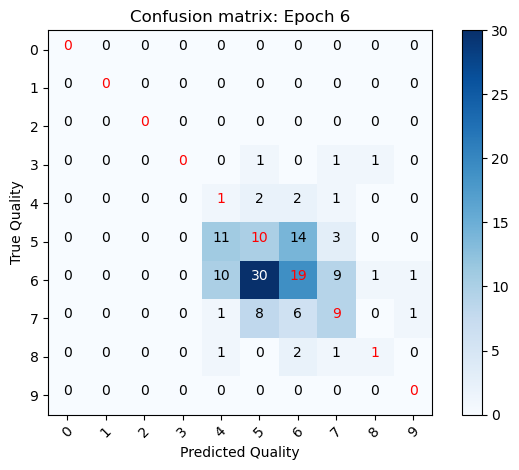

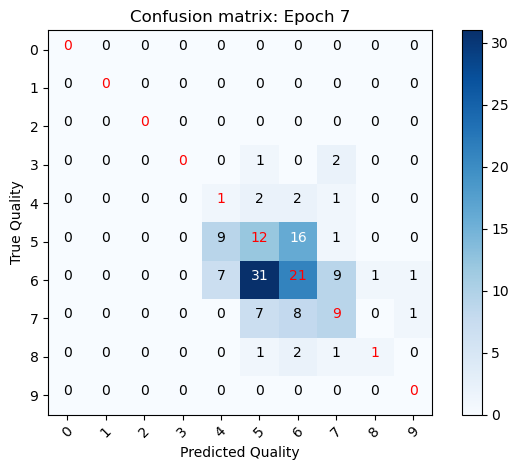

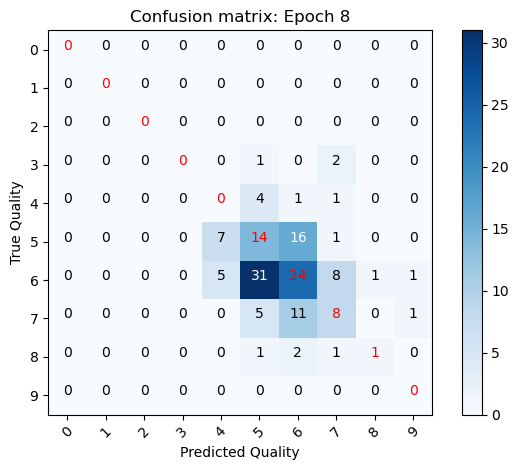

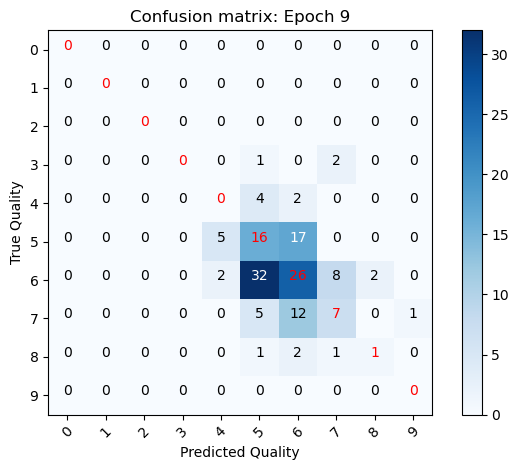

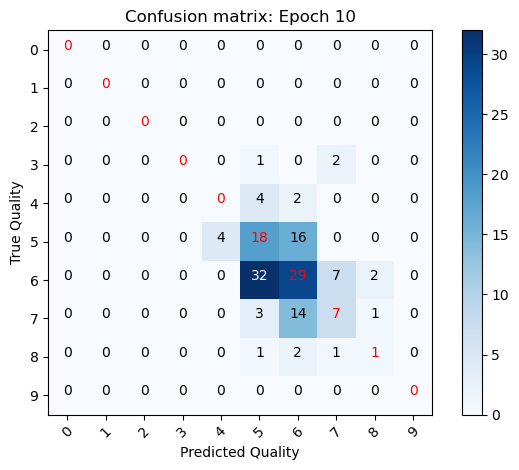

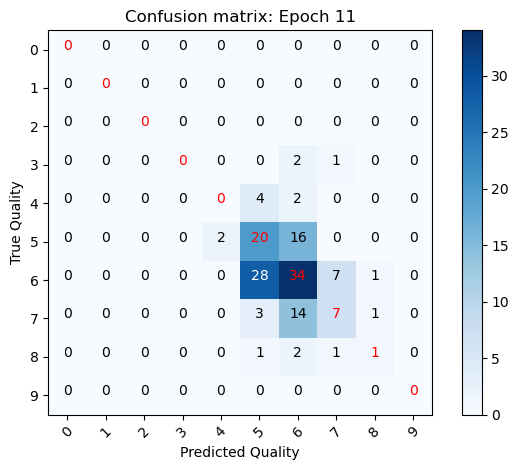

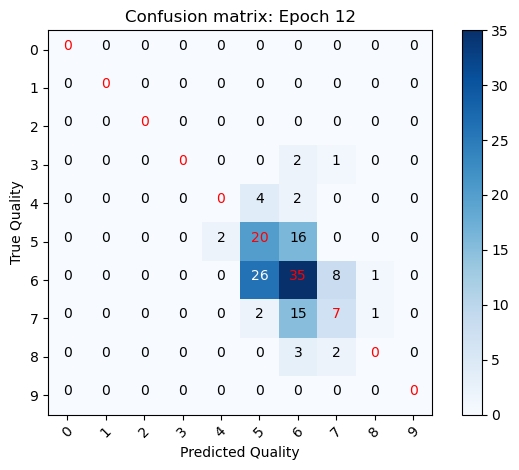

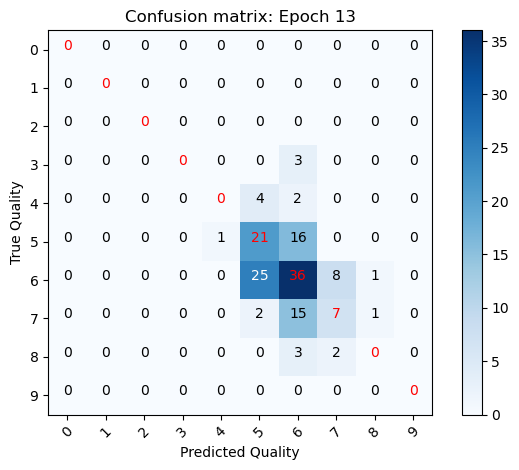

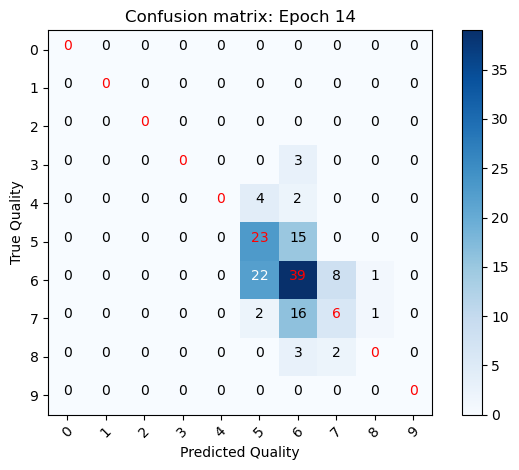

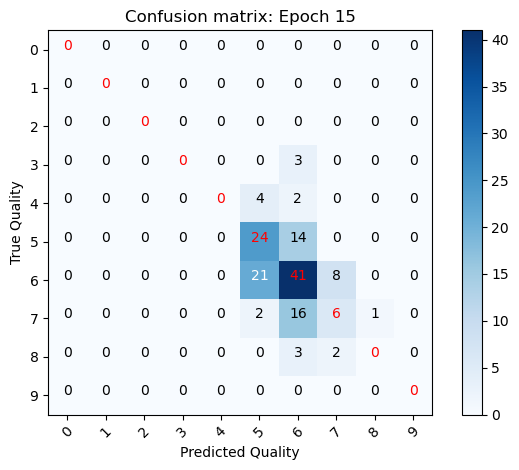

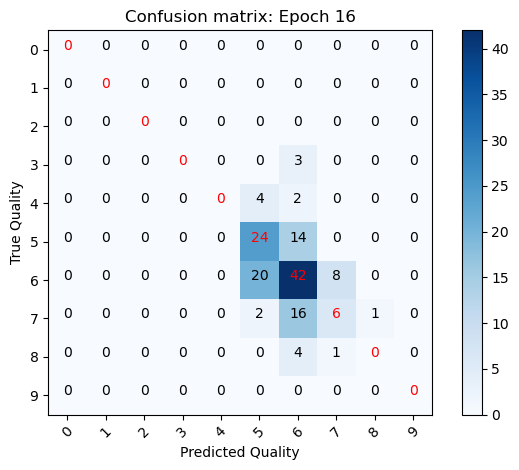

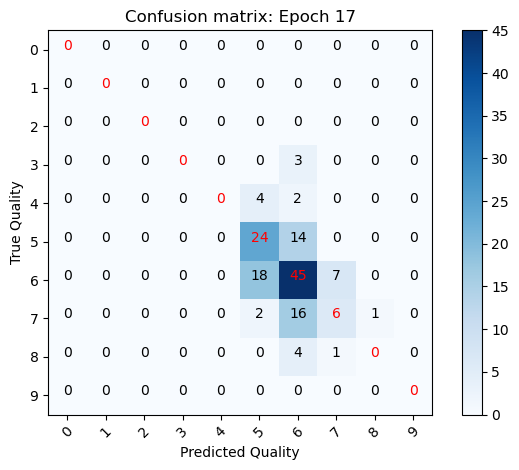

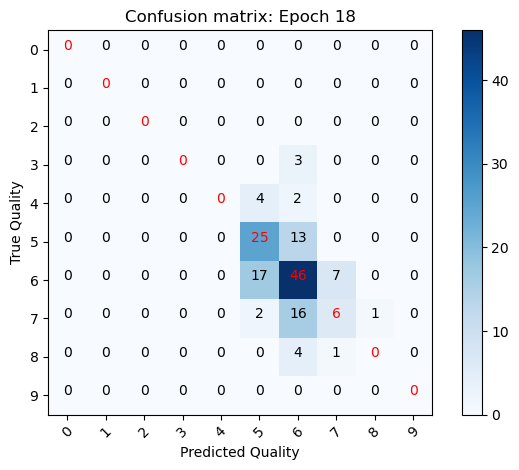

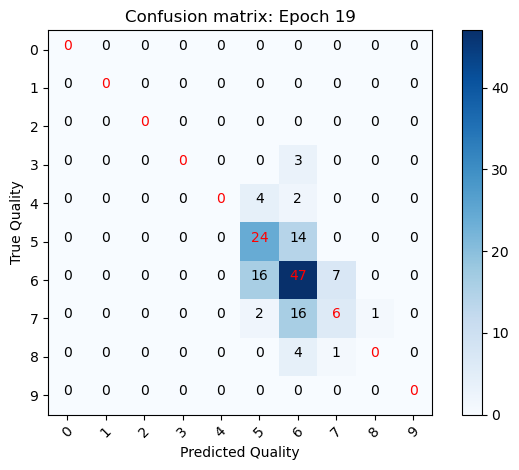

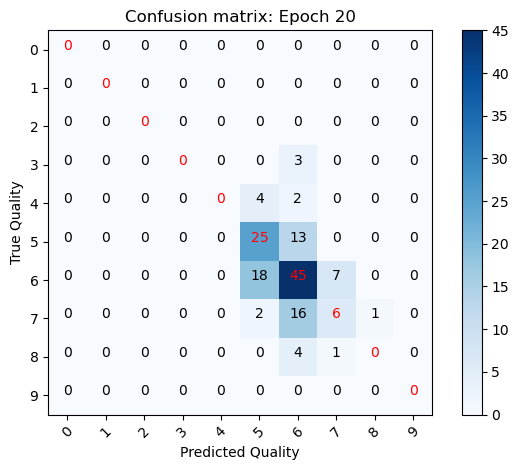

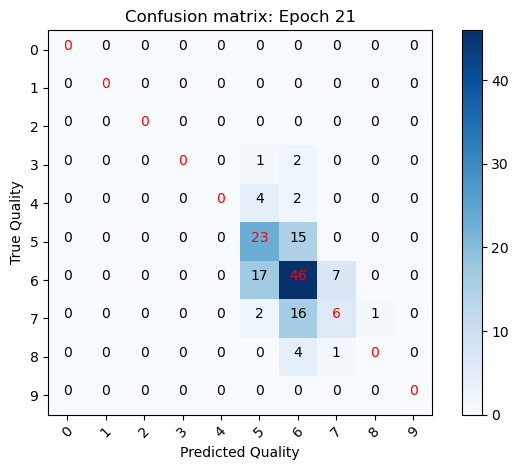

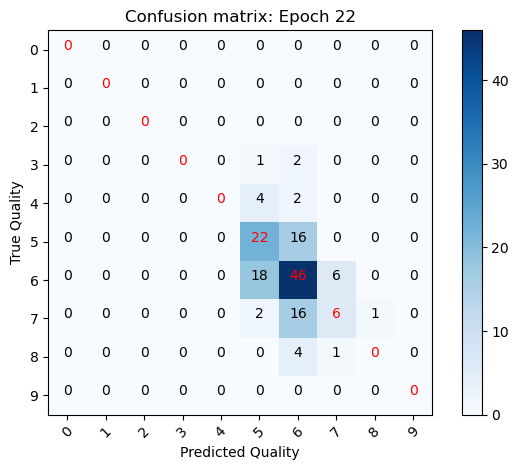

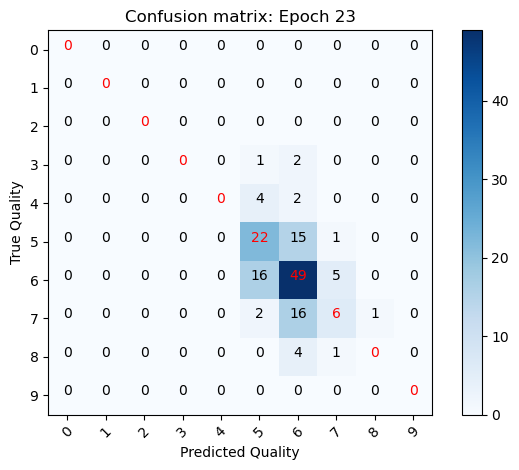

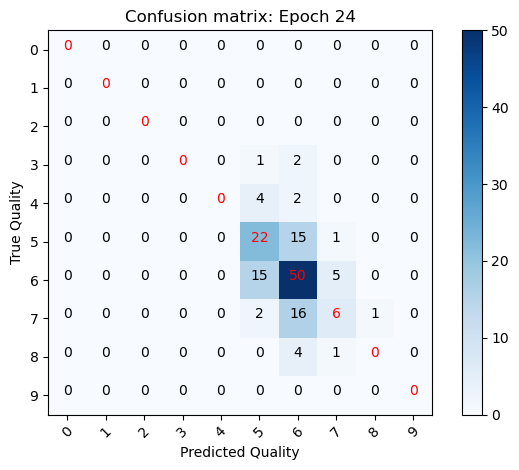

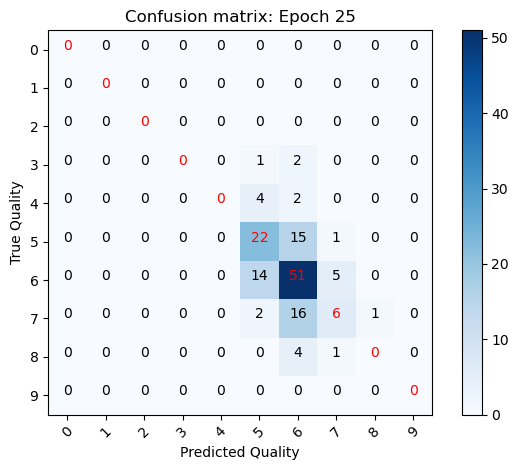

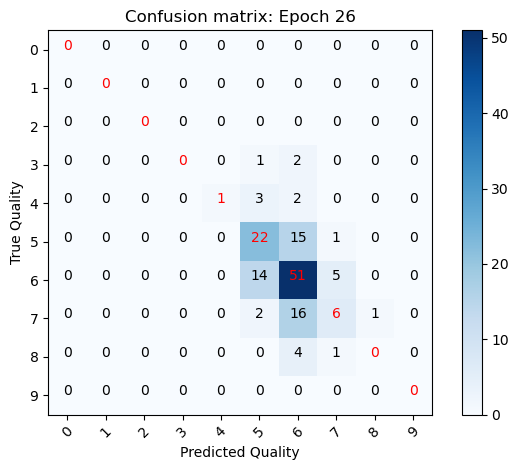

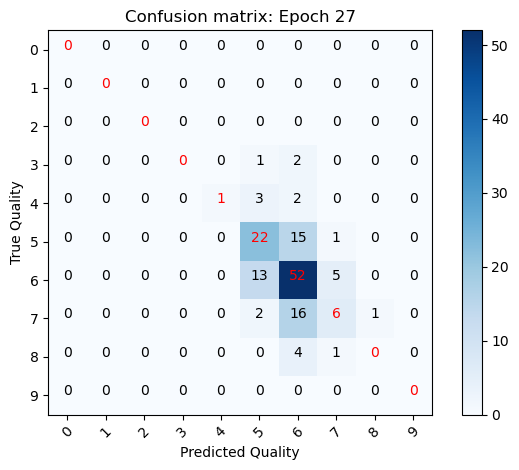

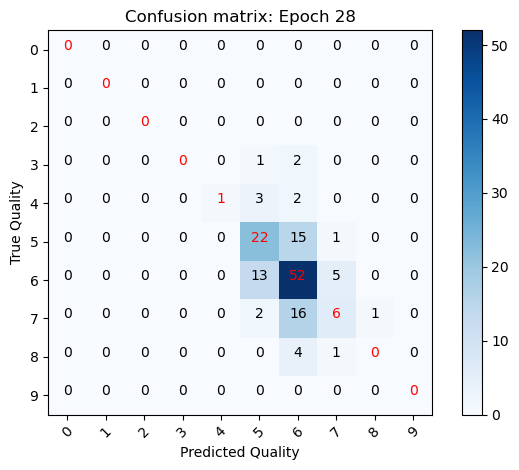

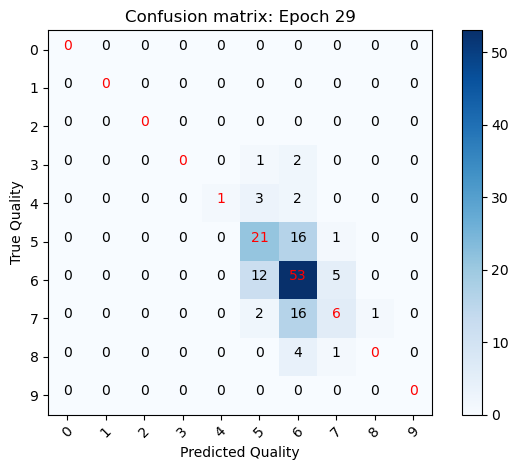

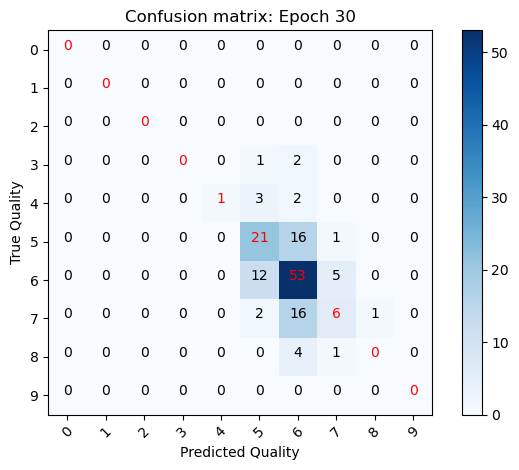

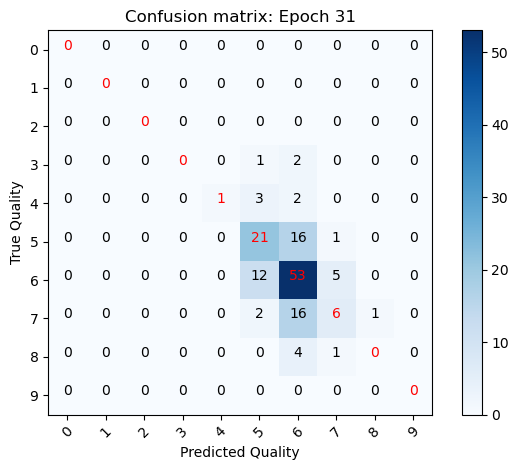

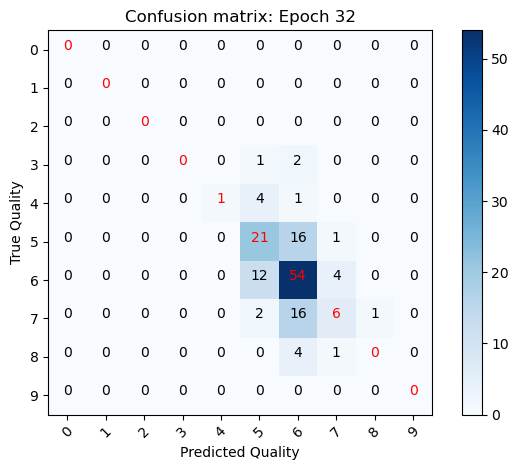

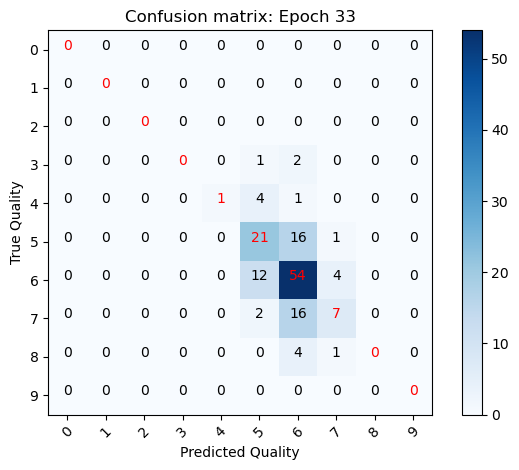

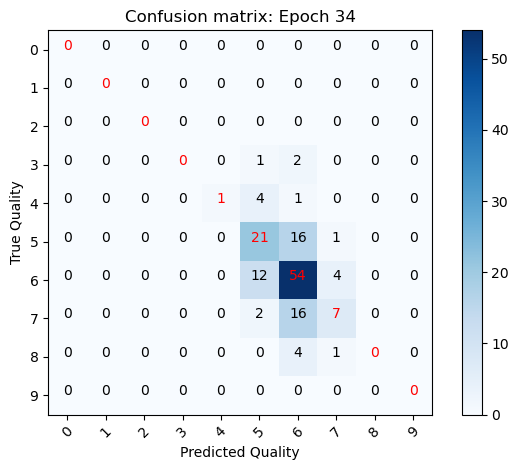

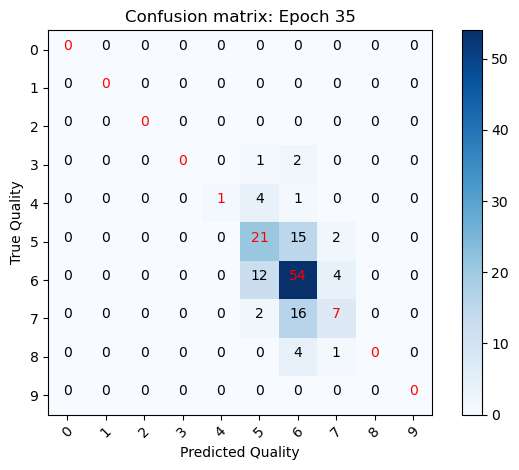

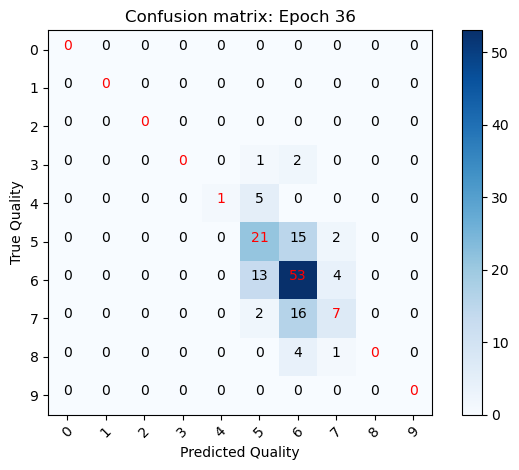

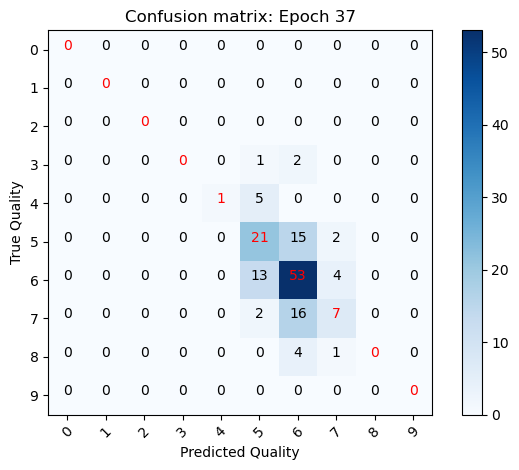

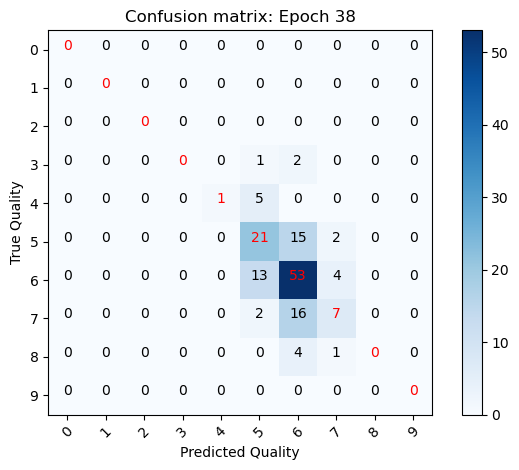

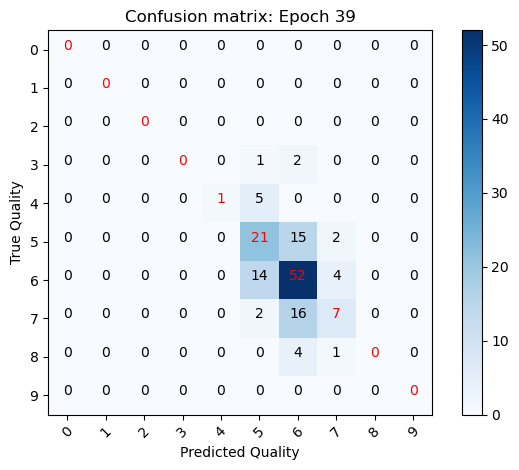

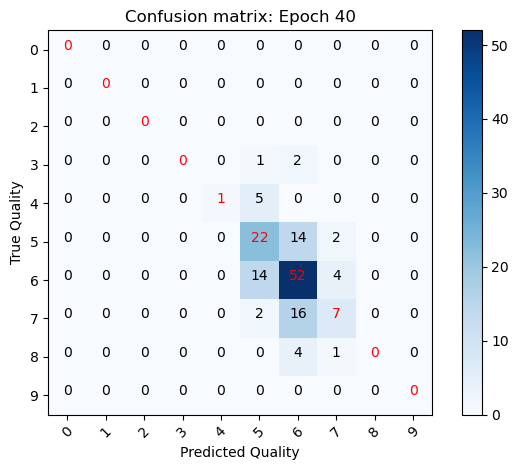

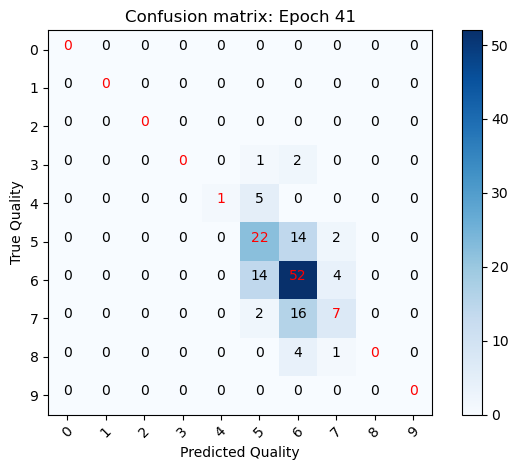

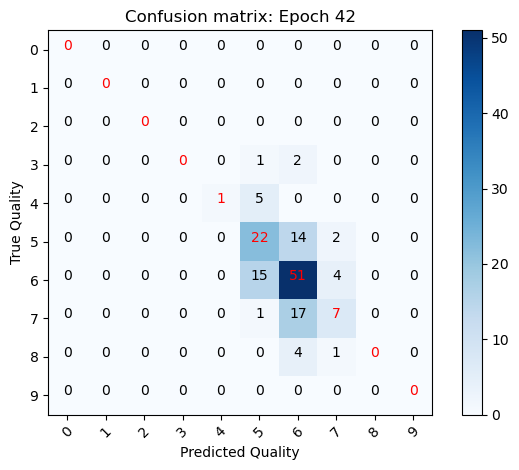

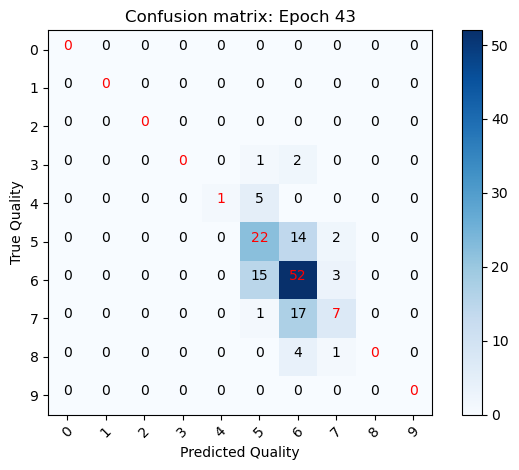

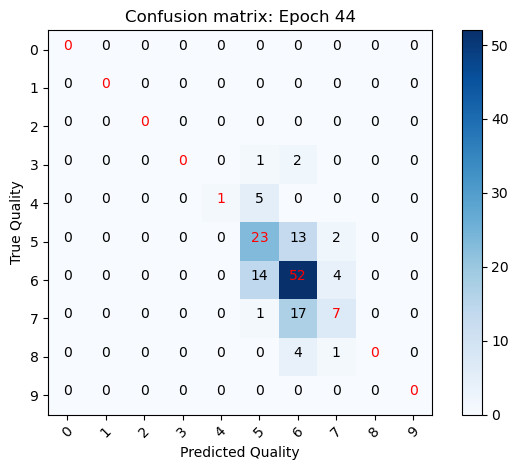

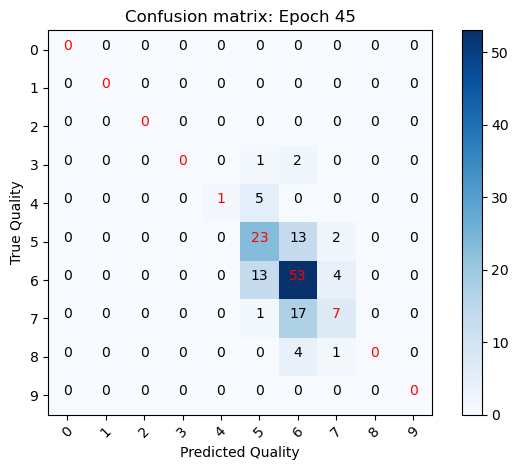

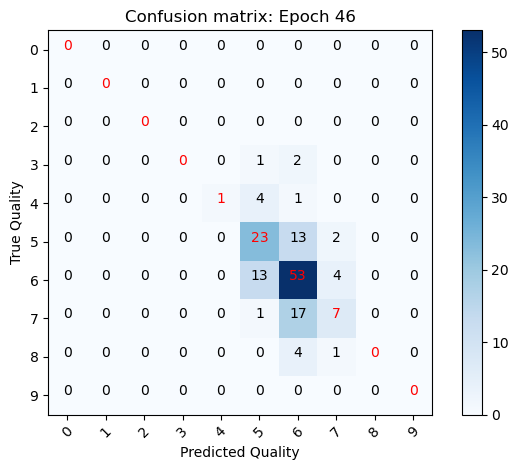

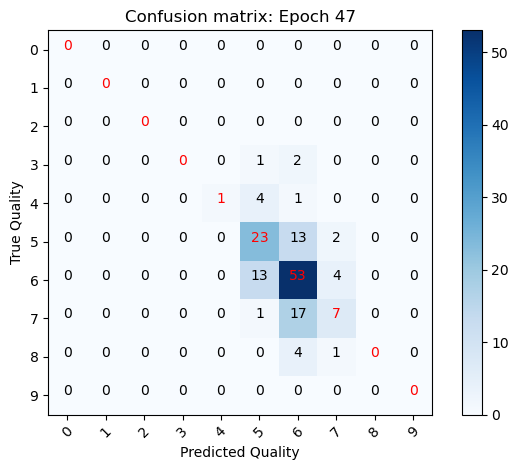

In [20]:
classes = list(range(10))

for epoch, training_progression in enumerate(training_progressions):
    y_true = training_progression["y_true"]
    y_pred = training_progression["y_pred"]
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=classes)
    
    # Plot confusion matrix
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion matrix: Epoch {epoch}')
    plt.colorbar()
    
    tick_marks = list(range(len(classes)))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            if i == j:
                number_color = "red"
            elif conf_matrix[i, j] > thresh:
                number_color = "white"
            else:
                number_color = "black"
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color=number_color)
    
    plt.ylabel('True Quality')
    plt.xlabel('Predicted Quality')
    plt.tight_layout()
    plt.show()